In [63]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [64]:
with open("input.csv") as f:
    lines = f.readlines()
    X = np.array([[int(i) for i in j.split(",")[:-1]] for j in lines])
    Y = np.array([int(i.replace("\n","").split(",")[-1]) for i in lines])
print(X)
print(Y)

[[3 3]
 [4 3]
 [1 1]]
[ 1  1 -1]


In [65]:
def draw(X, Y, weight, b):
    plt.figure()
    plt.cla()
    plt.xlim(0, np.max(X.T[0]) + 1)
    plt.ylim(0, np.max(X.T[1]) + 1)
    plt.scatter(X.T[0], X.T[1], c=Y)
    if True in list(weight == 0):
            plt.plot(0, 0)
    else:
        x1 = -b / weight[0]
        x2 = -b / weight[1]
        plt.plot([x1, 0], [0, x2])
    plt.pause(0.01)

In [66]:
def raw(X, Y, eta=1):  # 感知机的原始形式
    weight = np.zeros(X.shape[1])  # 初始化weight,b
    b = 0
    number = 0  # 记录训练次数
    mistake = True  # mistake是变量用来说明分类是否有错误
    while mistake is True:  # 当有错时
        mistake = False  # 开始下一轮纠错前需要将mistake变为true，一来判断这一轮是否有错误
        for index in range(X.shape[0]):  # 循环开始
            if Y[index] * (weight @ X[index] + b) <= 0:  # 错误判断条件
                weight += eta * Y[index] * X[index]  # 进行更新weight，b
                b += eta * Y[index]
                number += 1
                print(f"误分类点:{X[index]}，weignt:{weight}，b:{b}，w*x+b:{weight[0]}x(1)+{weight[1]}x(2)+{b}")
                draw(X, Y, weight, b)
                mistake = True  # 此轮检查出错误，表明mistake为true，进行下列一轮
                break  # 找出第一个错误后调出循环
    return weight, b  # 返回值

In [67]:
def dual(X, Y, eta=1):#感知机对偶形式
    Gram = np.dot(X, X.T)
    alpha = np.zeros(X.shape[0])
    b = 0
    mistake = True
    while mistake is True:
        mistake = False
        for index in range(X.shape[0]):
            if Y[index] * (alpha * Y @ Gram[index] + b) <= 0:
                alpha[index] += eta
                b += eta * Y[index]
                print(f"alpha:{alpha}，b:{b}")
                mistake = True
                break
    weight = Y * alpha @ X
    return weight, b

误分类点:[3 3]，weignt:[3. 3.]，b:1，w*x+b:3.0x(1)+3.0x(2)+1


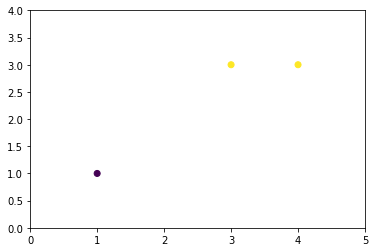

误分类点:[1 1]，weignt:[2. 2.]，b:0，w*x+b:2.0x(1)+2.0x(2)+0


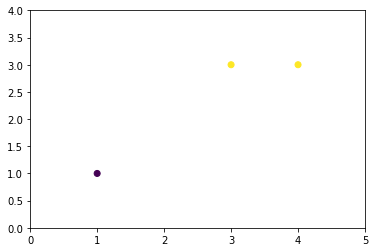

误分类点:[1 1]，weignt:[1. 1.]，b:-1，w*x+b:1.0x(1)+1.0x(2)+-1


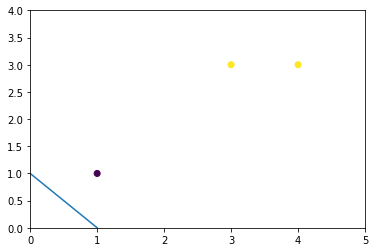

误分类点:[1 1]，weignt:[0. 0.]，b:-2，w*x+b:0.0x(1)+0.0x(2)+-2


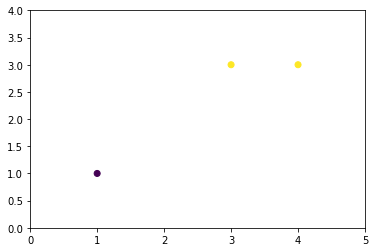

误分类点:[3 3]，weignt:[3. 3.]，b:-1，w*x+b:3.0x(1)+3.0x(2)+-1


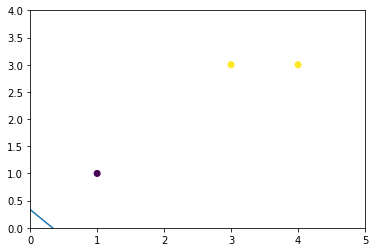

误分类点:[1 1]，weignt:[2. 2.]，b:-2，w*x+b:2.0x(1)+2.0x(2)+-2


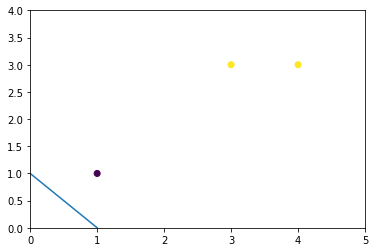

误分类点:[1 1]，weignt:[1. 1.]，b:-3，w*x+b:1.0x(1)+1.0x(2)+-3


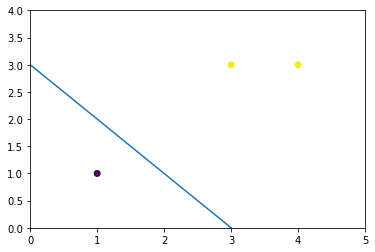

(array([1., 1.]), -3)

In [68]:
raw(X, Y, 1)

In [69]:
wopt,bopt = dual(X, Y, 1)

alpha:[1. 0. 0.]，b:1
alpha:[1. 0. 1.]，b:0
alpha:[1. 0. 2.]，b:-1
alpha:[1. 0. 3.]，b:-2
alpha:[2. 0. 3.]，b:-1
alpha:[2. 0. 4.]，b:-2
alpha:[2. 0. 5.]，b:-3


In [70]:
R = max(list(map(lambda x:np.linalg.norm(x, ord=None, axis=None, keepdims=False),X)))
rs = []
for i in range(len(X)):
    rt = Y[i]*(np.vdot(wopt,X[i])+bopt)
    rs.append(rt)
r = min(rs)

print(f"r:{r}，R:{R}，(R/r)的平方:{(R/r)**2}")

r:1.0，R:5.0，(R/r)的平方:25.0
